In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

In [2]:
texture=cv2.imread("./tex/091_W_Aya_2K_01.jpg")

In [3]:
pos1=[-34.772999,1199.119019,65.003197]
pos2=[-54.471600,1206.467041,74.437401]
pos3=[-49.924500,1194.778687,70.918404]

In [4]:
height = texture.shape[0]
width = texture.shape[1]
uv1=[0.061800*height,(1-0.851800)*width]
uv2=[0.064300*height,(1-0.839500)*width]
uv3=[0.069100*height,(1-0.845300)*width]
cnt=[np.array([[uv1,uv2,uv3]],dtype=np.int)]

In [5]:
mask=np.zeros_like(texture)
cv2.drawContours(mask,cnt,-1,(255,255,255),-1)
texture_part = cv2.copyTo(texture,mask)

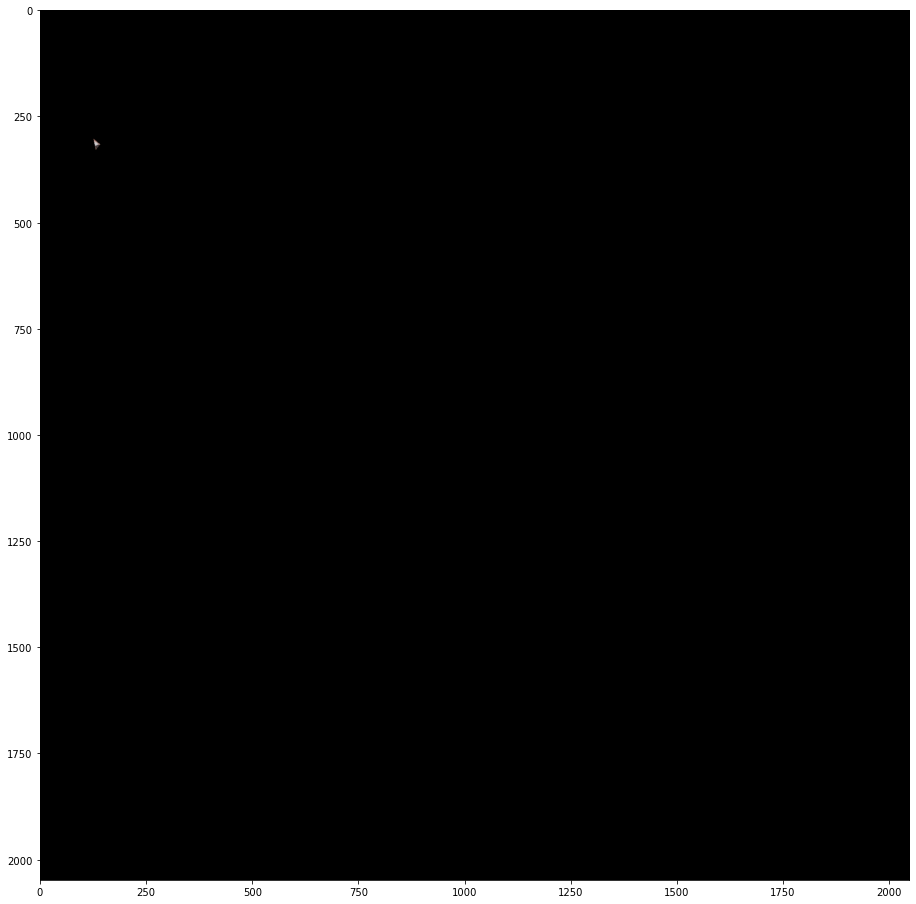

In [6]:
plt.figure(figsize=(16,16))
draw_texture = texture.copy()
cv2.drawContours(draw_texture,cnt,-1,(0,255,0),2)
plt.imshow(texture_part[...,::-1]/255.0)

In [7]:
triangle_uv = np.float32([uv1,uv2,uv3])
triangle_3d = np.float32([[pos1[0],pos1[1]],[pos2[0],pos2[1]],[pos3[0],pos3[1]]])
print(triangle_uv)
print(triangle_3d)
triangle_3d[...,0] = triangle_3d[...,0]-np.min(triangle_3d[...,0])

[[126.5664 303.5136]
 [131.6864 328.704 ]
 [141.5168 316.8256]]
[[ -34.773  1199.119 ]
 [ -54.4716 1206.467 ]
 [ -49.9245 1194.7787]]


In [8]:
warp_mat = cv2.getAffineTransform(triangle_uv,triangle_3d)

In [9]:
dst = cv2.warpAffine(texture_part,warp_mat,(height,width))

In [10]:
cv2.drawContours(dst,[triangle_3d[np.newaxis,...].astype(np.int)],-1,(0,255,0),1)
cv2.imwrite("wrap.jpg",dst)

True